# Section 02 - Mars SmallSat Aerocapture

## A. Mission Requirements

**The high-level mission objective is to deliver a small satellite to Mars orbit as a secondary payload on a Mars orbiter mission. 

The study requirements are as follows:

1. The mission concept should deliver a 10 kg small satellite as a secondary payload on a Mars orbiter mission to a near-polar Mars orbit. 
2. The interplanetary arrival conditions are defined by the host carrier spacecraft, and the host spacecraft will carry the small satellite during the interplanetary cruise and release it a few days prior to arrival at Mars. For the purpose of this study, use the Mars 2020 interplanetary transfer trajectory as a reference.
3. The secondary spacecraft should use an ADEPT-derived drag modulation aerocapture system and must fit within the constraints the of ESPA volume.
4. The mission concept must allow for at least 1 degree of Theoretical Corridor Width.
5. The maximum peak stagnation-point heat rate is not to exceed 240 W/cm2, which is the tested limit of the carbon cloth TPS.
6. The periapsis raise manuever Delta-V is not to exceed 50 m/s.

## B. Inteplanetary Arrival Conditions

In [10]:
import numpy as np
from astropy.time import Time
from AMAT.arrival import Arrival

In [11]:
arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='MARS',
                                      lastFlybyDate=Time("2020-07-30 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2021-02-18 00:00:00", scale='tdb'))

In [13]:
print("Arrival v_inf vector, ICRF: "+str(arrival.v_inf_vec)+" km/s")
print("Arrival VINF MAG: "+str(round(arrival.v_inf_mag, 2))+" km/s.")
print("Arrival Declination: "+str(round(arrival.declination, 2))+" deg.")

Arrival v_inf vector, ICRF: [ 2.23930484  1.20086474 -0.73683366] km/s
Arrival VINF MAG: 2.65 km/s.
Arrival Declination: -1.65 deg.


## C. Tradespace Exploration

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object
planet=Planet("MARS")
planet.h_skip = 120000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)

vinf_kms_array  = np.linspace( 0.0,   10.0,   11)
betaRatio_array = np.linspace( 1.0,   21.0 ,  11)

In [3]:
beta1 = 20.0
runID = 'mars-smallsat-dm'

In [4]:
v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + 2*np.ones(len(vinf_kms_array))*planet.GM/(planet.RP+120.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(betaRatio_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(betaRatio_array)))

In [5]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 100.0, beta1, 0.0, 1.767, 0.0, 0.10, planet)
        vehicle.setInitialState(120.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.setDragModulationVehicleParams(beta1,betaRatio_array[j])

        underShootLimit_array[i,j], exitflag_us_array[i,j] = vehicle.findUnderShootLimitD(2400.0, 2.0, -80.0,-4.0,1E-10,400.0)
        overShootLimit_array[i,j] , exitflag_os_array[i,j] = vehicle.findOverShootLimitD (2400.0, 2.0, -80.0,-4.0,1E-10,400.0)

        TCW_array[i,j]    = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print('VINF: '+str(vinf_kms_array[i])+' km/s, BETA RATIO: '+str(betaRatio_array[j])+' TCW: '+str(TCW_array[i,j])+' deg.')

np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'betaRatio_array.txt',betaRatio_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'underShootLimit_array.txt',underShootLimit_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'TCW_array.txt',TCW_array)

VINF: 0.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 0.0 km/s, BETA RATIO: 3.0 TCW: 0.6331547893350944 deg.
VINF: 0.0 km/s, BETA RATIO: 5.0 TCW: 0.882454714319465 deg.
VINF: 0.0 km/s, BETA RATIO: 7.0 TCW: 1.0427743183026905 deg.
VINF: 0.0 km/s, BETA RATIO: 9.0 TCW: 1.1635984738932166 deg.
VINF: 0.0 km/s, BETA RATIO: 11.0 TCW: 1.2595229061553255 deg.
VINF: 0.0 km/s, BETA RATIO: 13.0 TCW: 1.340319584349345 deg.
VINF: 0.0 km/s, BETA RATIO: 15.0 TCW: 1.4103928659460507 deg.
VINF: 0.0 km/s, BETA RATIO: 17.0 TCW: 1.471829855319811 deg.
VINF: 0.0 km/s, BETA RATIO: 19.0 TCW: 1.526306280073186 deg.
VINF: 0.0 km/s, BETA RATIO: 21.0 TCW: 1.5752168146937038 deg.
VINF: 1.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 1.0 km/s, BETA RATIO: 3.0 TCW: 0.6287910786122666 deg.
VINF: 1.0 km/s, BETA RATIO: 5.0 TCW: 0.8801561933833 deg.
VINF: 1.0 km/s, BETA RATIO: 7.0 TCW: 1.043120368183736 deg.
VINF: 1.0 km/s, BETA RATIO: 9.0 TCW: 1.1654429537884425 deg.
VINF: 1.0 km/s, BETA RATIO: 11.0 TCW: 1.2626815236471884

In [6]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(betaRatio_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(betaRatio_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(betaRatio_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(betaRatio_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 100.0, beta1, 0.0, 1.767, 0.0, 0.10, planet)
        vehicle.setInitialState(120.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)

        vehicle.propogateEntry (2400.0, 2.0, 0.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload


        vehicle=Vehicle('DMVehicle', 100.0, beta1, 0.0, 1.767, 0.0, 0.10, planet)
        vehicle.setInitialState(120.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams( 1E-6)

        vehicle.propogateEntry (2400.0, 2.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_os))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", BR: "+str(betaRatio_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, BR: 1.0 G_MAX: 0.8802169883233952 QDOT_MAX: 23.010132507245462 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR: 3.0 G_MAX: 0.8802169883233952 QDOT_MAX: 29.555384019133744 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR: 5.0 G_MAX: 0.8802169883233952 QDOT_MAX: 32.28708449463941 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR: 7.0 G_MAX: 0.8802169883233952 QDOT_MAX: 33.86168408174317 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR: 9.0 G_MAX: 0.8802169883233952 QDOT_MAX: 34.98985083922484 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR: 11.0 G_MAX: 0.8802169883233952 QDOT_MAX: 35.840414849324006 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR: 13.0 G_MAX: 0.8802169883233952 QDOT_MAX: 36.522759457900435 J_MAX: 4588.414832444406 STAG. PRES: 0.001708753559306077
V_infty: 0.0 km/s, BR

V_infty: 5.0 km/s, BR: 9.0 G_MAX: 3.7872559881702705 QDOT_MAX: 116.3336334305436 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 5.0 km/s, BR: 11.0 G_MAX: 3.7872559881702705 QDOT_MAX: 118.51057057238158 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 5.0 km/s, BR: 13.0 G_MAX: 3.7872559881702705 QDOT_MAX: 120.23831807942601 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 5.0 km/s, BR: 15.0 G_MAX: 3.7872559881702705 QDOT_MAX: 121.60067684638915 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 5.0 km/s, BR: 17.0 G_MAX: 3.7872559881702705 QDOT_MAX: 122.9720637626533 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 5.0 km/s, BR: 19.0 G_MAX: 3.7872559881702705 QDOT_MAX: 124.05028542527711 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 5.0 km/s, BR: 21.0 G_MAX: 3.7872559881702705 QDOT_MAX: 124.85988651159022 J_MAX: 9209.902950828016 STAG. PRES: 0.007342348590774492
V_infty: 6.0 km/

V_infty: 10.0 km/s, BR: 17.0 G_MAX: 14.304598311664126 QDOT_MAX: 527.4827212624576 J_MAX: 20984.95787893539 STAG. PRES: 0.02770830881406925
V_infty: 10.0 km/s, BR: 19.0 G_MAX: 14.304598311664126 QDOT_MAX: 530.9413685904443 J_MAX: 20984.95787893539 STAG. PRES: 0.02770830881406925
V_infty: 10.0 km/s, BR: 21.0 G_MAX: 14.304598311664126 QDOT_MAX: 533.4324214177385 J_MAX: 20984.95787893539 STAG. PRES: 0.02770830881406925


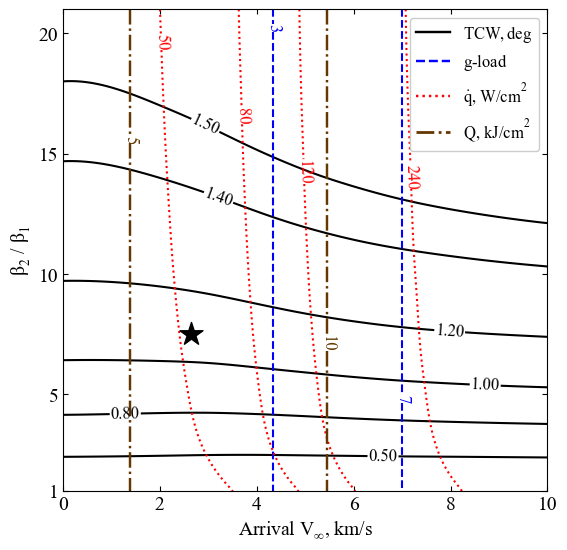

In [9]:
x = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/mars/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   10,  110)
y_new =  np.linspace( 0.0,   21 ,110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.5, 0.80, 1.0, 1.20, 1.40, 1.50])

Glevels = np.array([3, 7])
Qlevels = np.array([50, 80, 120, 240])
Hlevels = np.array([5, 10])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.25,6.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.xlim([0.0,10.0])
plt.ylim([1.0,21.0])


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[0].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=12, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)


HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=14)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=14)
plt.yticks(np.array([1, 5, 10, 15, 20]),fontsize=14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.legend(loc='upper left', fontsize=16)
from matplotlib.lines import Line2D
colors = ['black', 'red', 'green']
lines = [Line2D([0], [0], color='black', linewidth=1.75, linestyle='solid'),
         Line2D([0], [0], color='blue',  linewidth=1.75, linestyle='dashed'),
         Line2D([0], [0], color='red',  linewidth=1.75, linestyle='dotted'),
         Line2D([0], [0], color='xkcd:brown',  linewidth=2.00, linestyle='dashdot')]
labels = [r'$TCW, deg$', r'$g$'+r'-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$']
plt.legend(lines, labels, loc='upper right',fontsize=12, framealpha=1)

for l in Hlabels:
    l.set_rotation(-90)
for l in Glabels:
    l.set_rotation(-90)

#plt.axhline(y=7.5, color='k', linestyle='dotted')
#plt.text(4, 8.0, r'$\beta_2$'+' / '+r'$ \beta_1 $', fontsize=12)
plt.scatter(2.65, 7.5, marker="*", s=300, color='xkcd:black', zorder=100)

plt.show()

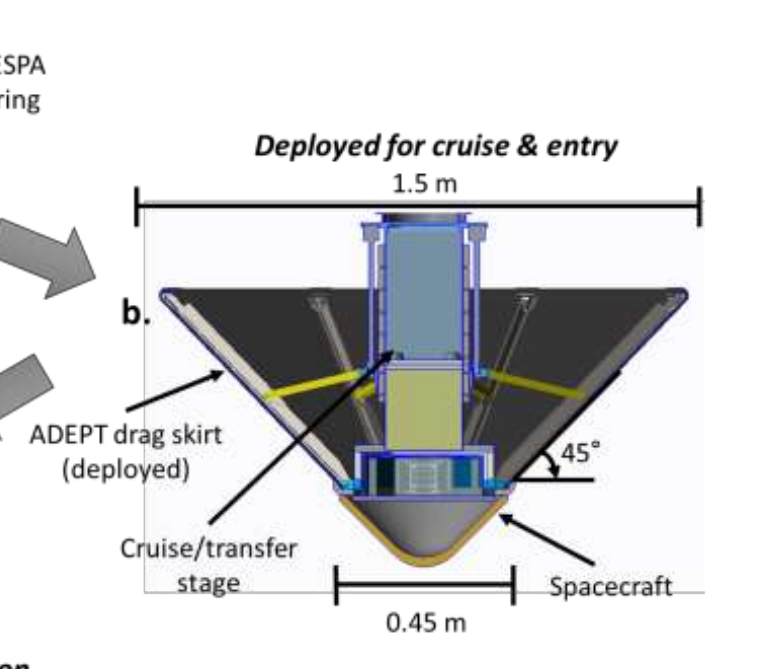

In [14]:
from IPython.display import Image
Image(filename='../../../plots/adept-ac-vehicle.png', width=500)

## D. Nominal Aerocapture Trajectory

In [16]:
planet = Planet('MARS')
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 120.0E3

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,0.0,0.0,5.74,0.0,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

Find the corridor bounds to select a target nominal EFPA for a nominal Mars atmosphere, with inertial correction.

In [18]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Target apoapis: 2000 km")
print("----------------")
print(underShootLimit, exitflag_us)
print(overShootLimit,  exitflag_os)
print("----------------")

Target apoapis: 2000 km
----------------
-10.329243024207244 1.0
-9.234456202302681 1.0
----------------


### Propagate an entry tarjectory at mid-corridor

In [19]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=10.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(200.0, 2500.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0, 
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle1.setInitialState(120.0,0.0,0.0,5.74,0.0,-9.7,0.0,0.0)

# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(0.5,1.0,0.1,2400.0)

H (km): 119.04 HDOT (m/s): -960.67  PRED. APO: 0.00
H (km): 118.56 HDOT (m/s): -957.44  PRED. APO: 0.00
H (km): 118.08 HDOT (m/s): -954.21  PRED. APO: 0.00
H (km): 117.60 HDOT (m/s): -950.97  PRED. APO: 0.00
H (km): 117.13 HDOT (m/s): -947.74  PRED. APO: 0.00
H (km): 116.65 HDOT (m/s): -944.50  PRED. APO: 0.00
H (km): 116.18 HDOT (m/s): -941.26  PRED. APO: 0.00
H (km): 115.71 HDOT (m/s): -938.02  PRED. APO: 0.00
H (km): 115.25 HDOT (m/s): -934.78  PRED. APO: 0.00
H (km): 114.78 HDOT (m/s): -931.53  PRED. APO: 0.00
H (km): 114.31 HDOT (m/s): -928.29  PRED. APO: 0.00
H (km): 113.85 HDOT (m/s): -925.04  PRED. APO: 0.00
H (km): 113.39 HDOT (m/s): -921.79  PRED. APO: 0.00
H (km): 112.93 HDOT (m/s): -918.54  PRED. APO: 0.00
H (km): 112.47 HDOT (m/s): -915.29  PRED. APO: 0.00
H (km): 112.01 HDOT (m/s): -912.04  PRED. APO: 0.00
H (km): 111.56 HDOT (m/s): -908.78  PRED. APO: 0.00
H (km): 111.10 HDOT (m/s): -905.52  PRED. APO: 0.00
H (km): 110.65 HDOT (m/s): -902.27  PRED. APO: 0.00
H (km): 110.

H (km): 57.05 HDOT (m/s): -297.88  PRED. APO: 0.00
H (km): 56.90 HDOT (m/s): -294.68  PRED. APO: 0.00
H (km): 56.76 HDOT (m/s): -291.49  PRED. APO: 0.00
H (km): 56.61 HDOT (m/s): -288.31  PRED. APO: 0.00
H (km): 56.47 HDOT (m/s): -285.14  PRED. APO: 0.00
H (km): 56.33 HDOT (m/s): -281.99  PRED. APO: 0.00
H (km): 56.19 HDOT (m/s): -278.85  PRED. APO: 0.00
H (km): 56.05 HDOT (m/s): -275.72  PRED. APO: 0.00
H (km): 55.91 HDOT (m/s): -272.61  PRED. APO: 0.00
H (km): 55.77 HDOT (m/s): -269.51  PRED. APO: 0.00
H (km): 55.64 HDOT (m/s): -266.42  PRED. APO: 0.00
H (km): 55.51 HDOT (m/s): -263.35  PRED. APO: 0.00
H (km): 55.38 HDOT (m/s): -260.29  PRED. APO: 0.00
H (km): 55.25 HDOT (m/s): -257.25  PRED. APO: 0.00
H (km): 55.12 HDOT (m/s): -254.23  PRED. APO: 0.00
H (km): 54.99 HDOT (m/s): -251.22  PRED. APO: 0.00
H (km): 54.87 HDOT (m/s): -248.22  PRED. APO: 0.00
H (km): 54.75 HDOT (m/s): -245.24  PRED. APO: 0.00
H (km): 54.62 HDOT (m/s): -242.28  PRED. APO: 0.00
H (km): 54.50 HDOT (m/s): -239.

H (km): 47.79, HDOT: 38.24, PREDICT. APO. ALT. :4909.6552431611835
H (km): 47.83, HDOT: 39.70, PREDICT. APO. ALT. :4849.66251023323
H (km): 47.87, HDOT: 41.14, PREDICT. APO. ALT. :4790.805244513178
H (km): 47.92, HDOT: 42.56, PREDICT. APO. ALT. :4733.0637022940555
H (km): 47.96, HDOT: 43.98, PREDICT. APO. ALT. :4676.418371042223
H (km): 48.00, HDOT: 45.38, PREDICT. APO. ALT. :4620.849972466901
H (km): 48.05, HDOT: 46.77, PREDICT. APO. ALT. :4566.339469515963
H (km): 48.10, HDOT: 48.15, PREDICT. APO. ALT. :4512.868072755969
H (km): 48.15, HDOT: 49.52, PREDICT. APO. ALT. :4460.417242607517
H (km): 48.20, HDOT: 50.88, PREDICT. APO. ALT. :4408.968690779132
H (km): 48.25, HDOT: 52.22, PREDICT. APO. ALT. :4358.504381232878
H (km): 48.30, HDOT: 53.56, PREDICT. APO. ALT. :4309.006530714432
H (km): 48.35, HDOT: 54.88, PREDICT. APO. ALT. :4260.457608878576
H (km): 48.41, HDOT: 56.19, PREDICT. APO. ALT. :4212.840338039645
H (km): 48.47, HDOT: 57.49, PREDICT. APO. ALT. :4166.137692575034
H (km): 4

H (km): 68.53, HDOT: 193.55, PREDICT. APO. ALT. :1963.463200561475
H (km): 68.72, HDOT: 194.28, PREDICT. APO. ALT. :1961.0281085819033
H (km): 68.92, HDOT: 195.00, PREDICT. APO. ALT. :1958.637731049275
H (km): 69.11, HDOT: 195.72, PREDICT. APO. ALT. :1956.2871598054319
H (km): 69.31, HDOT: 196.44, PREDICT. APO. ALT. :1953.9731760269347
H (km): 69.50, HDOT: 197.16, PREDICT. APO. ALT. :1951.6948627911993
H (km): 69.70, HDOT: 197.88, PREDICT. APO. ALT. :1949.4536493502324
H (km): 69.90, HDOT: 198.59, PREDICT. APO. ALT. :1947.2533410158567
H (km): 70.10, HDOT: 199.31, PREDICT. APO. ALT. :1945.0993245246884
H (km): 70.30, HDOT: 200.03, PREDICT. APO. ALT. :1942.996029781418
H (km): 70.50, HDOT: 200.74, PREDICT. APO. ALT. :1940.9460476885242
H (km): 70.70, HDOT: 201.46, PREDICT. APO. ALT. :1938.9500877635014
H (km): 70.90, HDOT: 202.17, PREDICT. APO. ALT. :1937.006953186526
H (km): 71.10, HDOT: 202.89, PREDICT. APO. ALT. :1935.1140151330278
H (km): 71.31, HDOT: 203.60, PREDICT. APO. ALT. :193

H (km): 106.28, HDOT: 298.31, PREDICT. APO. ALT. :1873.3739387023747
H (km): 106.58, HDOT: 298.96, PREDICT. APO. ALT. :1873.3578619113825
H (km): 106.88, HDOT: 299.61, PREDICT. APO. ALT. :1873.3421174353696
H (km): 107.18, HDOT: 300.26, PREDICT. APO. ALT. :1873.3266875699694
H (km): 107.48, HDOT: 300.91, PREDICT. APO. ALT. :1873.311555692927
H (km): 107.78, HDOT: 301.56, PREDICT. APO. ALT. :1873.2967064114036
H (km): 108.08, HDOT: 302.21, PREDICT. APO. ALT. :1873.282125510742
H (km): 108.39, HDOT: 302.86, PREDICT. APO. ALT. :1873.2677996190841
H (km): 108.69, HDOT: 303.51, PREDICT. APO. ALT. :1873.25371602742
H (km): 108.99, HDOT: 304.15, PREDICT. APO. ALT. :1873.2398626794647
H (km): 109.30, HDOT: 304.80, PREDICT. APO. ALT. :1873.2262280445584
H (km): 109.60, HDOT: 305.45, PREDICT. APO. ALT. :1873.2128009823216
H (km): 109.91, HDOT: 306.09, PREDICT. APO. ALT. :1873.1995707383696
H (km): 110.22, HDOT: 306.74, PREDICT. APO. ALT. :1873.1865270727826
H (km): 110.52, HDOT: 307.38, PREDICT.

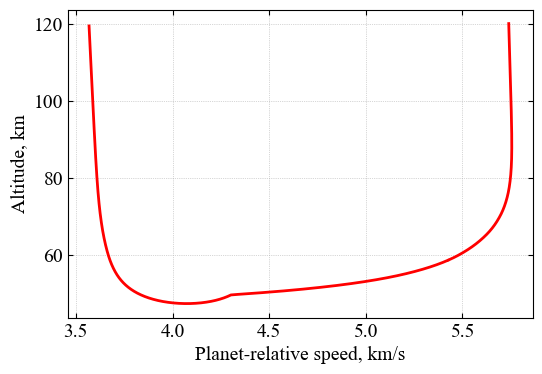

In [20]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.v_kms_full, vehicle1.h_km_full, 'r-', linewidth=2.0)

plt.xlabel('Planet-relative speed, km/s',fontsize=14)
plt.ylabel('Altitude, km',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

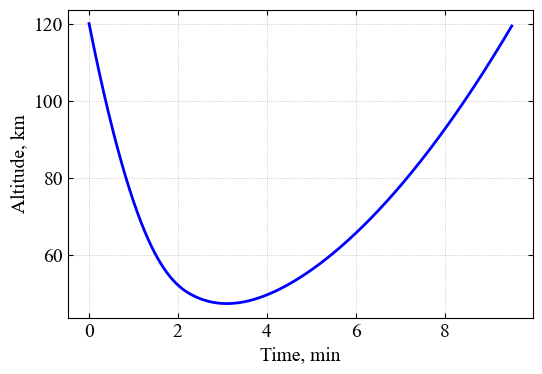

In [21]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)

plt.xlabel('Time, min',fontsize=14)
plt.ylabel('Altitude, km',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

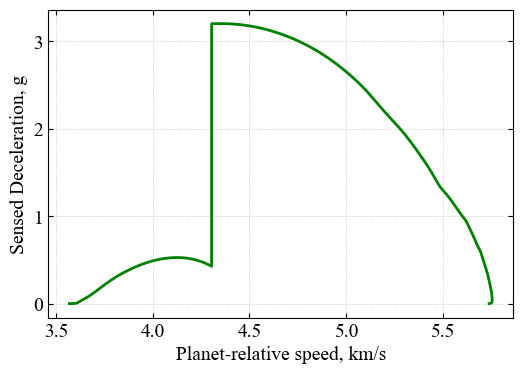

In [22]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.v_kms_full, vehicle1.acc_net_g_full, 'g-', linewidth=2.0)

plt.xlabel('Planet-relative speed, km/s',fontsize=14)
plt.ylabel('Sensed Deceleration, g',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.show()

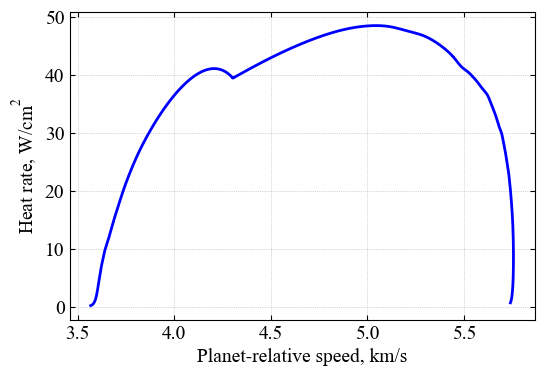

In [23]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.v_kms_full, vehicle1.q_stag_total_full, 'b-', linewidth=2.0)

plt.xlabel('Planet-relative speed, km/s',fontsize=14)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

In [24]:
vehicle1.terminal_apoapsis

1872.867260898715

In [25]:
vehicle1.terminal_periapsis

43.96750356899621

In [26]:
vehicle1.periapsis_raise_DV

34.016953096638645

## E. Effect of Atmospheric Mean Density Uncertainties

In [27]:
planet = Planet('MARS')
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 120e3
planet.h_low  = 10e3
planet.h_trap = 10e3

In [37]:
ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert = planet.loadMonteCarloDensityFile2('../../../atmdata/Mars/LAT00N.txt', 0, 1, 2, 3, 4, heightInKmFlag=True)
density_int_low = planet.loadAtmosphereModel6(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, -3.0, 156, 1)
density_int_avg = planet.loadAtmosphereModel6(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high,  0.0, 156, 1)
density_int_hig = planet.loadAtmosphereModel6(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, +3.0, 156, 1)

In [38]:
planet1 = Planet('MARS')
planet2 = Planet('MARS')
planet3 = Planet('MARS')

planet1.density_int = density_int_low
planet2.density_int = density_int_avg
planet3.density_int = density_int_hig

In [39]:
h_array = np.linspace(0, 120e3, 1001)

d_min_arr = planet1.densityvectorized(h_array)
d_avg_arr = planet2.densityvectorized(h_array)
d_max_arr = planet3.densityvectorized(h_array)

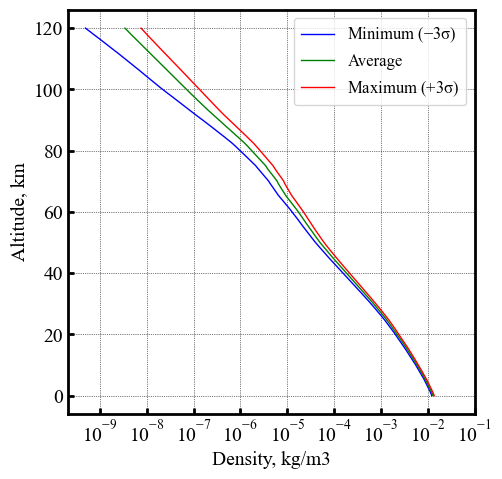

In [46]:
fig = plt.figure()
fig.set_size_inches([5.25, 5.25])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(d_min_arr, h_array*1E-3, 'b-', linewidth=1.0, label="Minimum "+r"$(-3\sigma)$")
plt.plot(d_avg_arr, h_array*1E-3, 'g-', linewidth=1.0, label="Average")
plt.plot(d_max_arr, h_array*1E-3, 'r-', linewidth=1.0, label="Maximum "+r"$(+3\sigma)$")
plt.xlabel("Density, kg/m3",fontsize=14)
plt.ylabel("Altitude, km",fontsize=14)
plt.xscale('log')
plt.yticks(fontsize=14)
plt.xticks(np.logspace(-9, -1, 9), fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper right', fontsize=12, framealpha=0.8)

#plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/density-variations.png', dpi= 300,bbox_inches='tight')
#plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/density-variations.pdf', dpi=300,bbox_inches='tight')
#plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/density-variations.eps', dpi=300,bbox_inches='tight')
plt.show()

### Compute corridor bounds for low density atmosphere

In [47]:
planet.density_int = density_int_low

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,0.0,0.0,5.74,0.0,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -9.4849 deg
Undershoot limit : -10.5427 deg
TCW: 1.0578 deg


In [48]:
planet.density_int = density_int_avg

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,0.0,0.0,5.74,0.0,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -9.2949 deg
Undershoot limit : -10.4540 deg
TCW: 1.1591 deg


In [49]:
planet.density_int = density_int_hig

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,0.0,0.0,5.74,0.0,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -9.1097 deg
Undershoot limit : -10.3676 deg
TCW: 1.2579 deg


# F. Target EFPA Selection

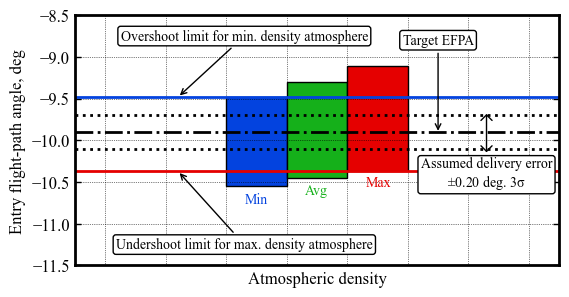

In [86]:
from matplotlib.patches import Polygon

fig = plt.figure()
fig.set_size_inches([6.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

ax = plt.gca()


x1 = [1.0, 1.0, 2.0, 2.0]
y1 = [-10.5427, -9.4849, -9.4849, -10.5427]

x2 = [2.0, 2.0, 3.0, 3.0]
y2 = [-10.4540,-9.2949, -9.2949,  -10.4540]

x3 = [3.0, 3.0, 4.0, 4.0]
y3 = [-10.3676, -9.1097 , -9.1097 , -10.3676]



poly1 = Polygon( list(zip(x1,y1)), facecolor='xkcd:blue', edgecolor='k')
ax.add_patch(poly1)

poly2 = Polygon( list(zip(x2,y2)), facecolor='xkcd:green', edgecolor='k')
ax.add_patch(poly2)

poly3 = Polygon( list(zip(x3,y3)), facecolor='xkcd:red', edgecolor='k')
ax.add_patch(poly3)


plt.ylabel("Entry flight-path angle, deg",fontsize=12)
plt.xlabel("Atmospheric density",fontsize=12)

plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.axhline(y=-9.4849, linewidth=2.0, linestyle='solid' ,color='xkcd:blue')
plt.axhline(y=-10.3676, linewidth=2.0, linestyle='solid' ,color='xkcd:red')
plt.axhline(y=-9.90, linewidth=2.0, linestyle='dashdot' ,color='xkcd:black')
plt.axhline(y=-9.70, linewidth=2.0, linestyle='dotted' ,color='xkcd:black')
plt.axhline(y=-10.10, linewidth=2.0, linestyle='dotted' ,color='xkcd:black')

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
plt.yticks(fontsize=12)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=1, length=4)
ax.yaxis.set_tick_params(width=1, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    

plt.annotate("Overshoot limit for min. density atmosphere", xy=(0.20, -9.4849), xytext=(1.3, -8.75),
               va="center", ha="center",
               arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=10, color='k',
               bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

plt.annotate("Undershoot limit for max. density atmosphere"  , xy=(0.20, -10.3676),
                                                                   xytext=(1.3, -11.250),
                                                                   va="center", ha="center",
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=10,color='k',
                     bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

plt.annotate("Target EFPA"  , xy=(4.5, -9.92),
                                                                   xytext=(4.5, -8.8),
                                                                   va="center", ha="center",
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=10,color='k',
                     bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

plt.annotate("Assumed delivery error\n" +r"$\pm 0.20$"+ " deg. "+ r"$3\sigma$"  , xy=(5.3, -9.65),
                                                                   xytext=(5.3, -10.40),
                                                                   va="center", ha="center",
                    arrowprops=dict(arrowstyle='<->, head_width=0.4', facecolor='blue'), fontsize=10,color='k',
                     bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

ax.set_xlim([-1.5, 6.5])
ax.set_ylim([-11.5, -8.5])

plt.text(1.3, -10.75, 'Min', color='xkcd:blue', fontsize=10)
plt.text(2.3, -10.65, 'Avg', color='xkcd:green', fontsize=10)
plt.text(3.3, -10.55, 'Max', color='xkcd:red', fontsize=10)
plt.show()

In [85]:
(-9.4849+-10.3676)/2

-9.92625

## Performance Analysis

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon

In [6]:
# Set up the planet and atmosphere model.
planet=Planet("MARS")
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 120e3
planet.h_low=10.0E3

# Set up the drag modulation vehicle.
vehicle=Vehicle('MarsSmallSat1', 20, 37, 0.0, np.pi*1.5**2, 0.0, 0.10, planet)

vehicle.setInitialState(120.0,0.0,0.0,5.74,0.0,-9.92,0.0,0.0)
vehicle.setSolverParams(1E-6)
vehicle.setDragModulationVehicleParams(20, 7.5)

# Set up the drag modulation entry phase guidance parameters.
vehicle.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set the target orbit parameters.
vehicle.setTargetOrbitParams(200.0, 2000.0, 20.0)

# Define the path to atmospheric files to be used for the Monte Carlo simulations.
atmfiles = ['../../../atmdata/Mars/LAT00N.txt',
            '../../../atmdata/Mars/LAT20N.txt',
            '../../../atmdata/Mars/LAT40N.txt',
            '../../../atmdata/Mars/LAT60N.txt',
            '../../../atmdata/Mars/LAT80N.txt'
            '../../../atmdata/Mars/LAT20S.txt',
            '../../../atmdata/Mars/LAT40S.txt',
            '../../../atmdata/Mars/LAT60S.txt',
            '../../../atmdata/Mars/LAT80S.txt']

# Set up the Monte Carlo simulation for drag modulation.
# NPOS = 156, NMONTE = 1000
# Target EFPA = -12.05 deg
# EFPA 1-sigma error = +/- 0.067 deg
# Nominal beta_1 = 66.4 kg/m2
# beta_1 1-sigma = 0.0
# guidance time step for entry = 1.0s (Freq. = 1 Hz)
# guidance time step after jettison = 1.0 s
# max. solver time step = 0.1 s
# max. time used by solver = 2400 s

vehicle.setupMonteCarloSimulationD(156, 1000, atmfiles, 0 , 1, 2, 3, 4, heightInKmFlag=True,
                                   -9.90,  0.0667, 20, 0.0,
                                    0.5, 1.0, 0.1, 2400.0)
# Run 200 trajectories
vehicle.runMonteCarloD2(10, '../../../data/acta-astronautica/smallsat-mission-concepts/mars/MCBX3')

ValueError: cannot reshape array of size 0 into shape (0,newaxis)